In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
frame = pd.read_csv("fwt.csv")

In [3]:
frame['Event'].unique()

array(['Verbier', 'Ordino Arcalis', 'Fieberbrunn', 'Kicking Horse',
       'Hakuba', 'Vallnord Arcalis', 'Haines', 'Chamonix Montblanc'],
      dtype=object)

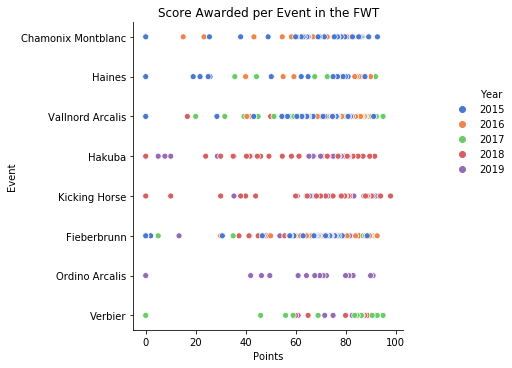

In [5]:
f = sns.relplot(x="Points", y="Event", hue="Year", data=frame, palette=sns.color_palette("muted", n_colors=5))
leg = f._legend
leg.set_bbox_to_anchor([1.22, 0.8])  # coordinates of lower left of bounding box
leg._loc = 1
plt.tight_layout()
plt.title('Score Awarded per Event in the FWT')
#plt.suptitle('2015-2019')
plt.savefig('events.png', bbox_inches = 'tight')
plt.show()

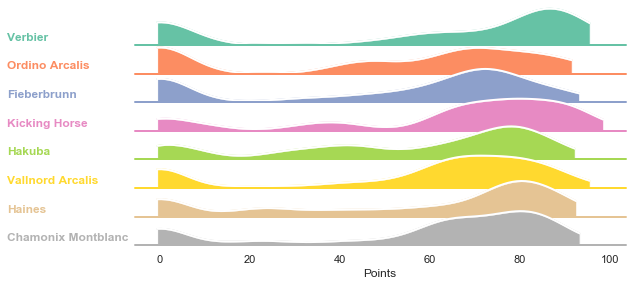

In [30]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(frame, row="Event", hue="Event", aspect=15, height=.5, palette="Set2")

# Draw the densities in a few steps
g.map(sns.kdeplot, "Points", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Points", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-.26, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Points")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig('venues.png',bbox_inches = 'tight')
plt.show()